In [1]:
import os

def create_folder(folder_name):
    # Check if the folder already exists
    if not os.path.exists(folder_name):
        # Create the folder
        os.makedirs(folder_name)
        print(f"Folder '{folder_name}' created successfully.")
    else:
        print(f"Folder '{folder_name}' already exists.")

import os

def create_sub_folder(parent_folder, subfolder):
    # Combine the parent folder and subfolder to get the full path
    full_path = os.path.join(parent_folder, subfolder)

    # Create the directories (including any intermediate directories)
    os.makedirs(full_path, exist_ok=True)

    # Print a message confirming the creation
    print(f"Folder '{full_path}' created successfully.")




In [2]:
create_folder("Data_Collection_Preprocessing")

Folder 'Data_Collection_Preprocessing' already exists.


In [3]:
import pandas as pd

# Data to convert into CSV
data = {
    'Height': [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    'Weight': [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    'Age': [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    'Grip strength': [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    'Frailty': ['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']
}

# Creating a DataFrame
df = pd.DataFrame(data)
df.head()


,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [4]:
# Create Dataset Folder
create_sub_folder("Data_Collection_Preprocessing","Raw_Data")

Folder 'Data_Collection_Preprocessing/Raw_Data' created successfully.


In [5]:
folder_path = 'Data_Collection_Preprocessing/Raw_Data'
file_path = os.path.join(folder_path, 'health_data.csv')

# Create the necessary directories if they don't exist
os.makedirs(folder_path, exist_ok=True)

# Save the DataFrame as a CSV file
df.to_csv(file_path, index=False)

# Output the file path
print(f"Data saved to: {file_path}")

Data saved to: Data_Collection_Preprocessing/Raw_Data/health_data.csv


In [6]:
create_sub_folder("Data_Collection_Preprocessing","Cleaned_Data")

Folder 'Data_Collection_Preprocessing/Cleaned_Data' created successfully.


In [7]:
# Ensure correct data types for numerical columns
df[['Height', 'Weight', 'Age', 'Grip strength']] = df[['Height', 'Weight', 'Age', 'Grip strength']].astype(float)

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values (only for numerical columns)
numerical_cols = ['Height', 'Weight', 'Age', 'Grip strength']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

cleaned_file_path = "Data_Collection_Preprocessing/Cleaned_Data/cleaned_health_data.csv"
df.to_csv(cleaned_file_path, index=False)

# Output message
print(f"✅ Cleaned data saved to: {cleaned_file_path}")

✅ Cleaned data saved to: Data_Collection_Preprocessing/Cleaned_Data/cleaned_health_data.csv


In [8]:
df.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112.0,30.0,30.0,N
1,71.5,136.0,19.0,31.0,N
2,69.4,153.0,45.0,29.0,N
3,68.2,142.0,22.0,28.0,Y
4,67.8,144.0,29.0,24.0,Y


In [9]:
create_sub_folder("Data_Collection_Preprocessing","Processed_Data")

Folder 'Data_Collection_Preprocessing/Processed_Data' created successfully.


In [10]:
import os
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Convert 'Frailty' column to binary (0 for 'N', 1 for 'Y')
df['Frailty'] = df['Frailty'].apply(lambda x: 1 if x == 'Y' else 0)

# Remove outliers using Z-score method (keeping only values within 3 standard deviations)
z_scores = stats.zscore(df[numerical_cols])
df = df[(abs(z_scores) < 3).all(axis=1)]

# Scale numerical data using StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define the processed file path
processed_file_path = "/content/Data_Collection_Preprocessing/Processed_Data/processed_health_data.csv"

# Ensure the directory exists
os.makedirs(os.path.dirname(processed_file_path), exist_ok=True)

# Save processed data
df.to_csv(processed_file_path, index=False)
print(f"✅ Processed data saved to: {processed_file_path}")


✅ Processed data saved to: /content/Data_Collection_Preprocessing/Processed_Data/processed_health_data.csv


In [11]:
df.head()

,Height,Weight,Age,Grip strength,Frailty
0,-1.766641,-1.473912,-0.204911,0.932505,0
1,1.829735,0.303670,-1.106520,1.165631,0
2,0.504754,1.562791,1.024556,0.699379,0
3,-0.252377,0.748066,-0.860627,0.466252,1
4,-0.504754,0.896198,-0.286876,-0.466252,1


In [12]:
create_sub_folder("Data_Collection_Preprocessing","Visualization_Results")

Folder 'Data_Collection_Preprocessing/Visualization_Results' created successfully.


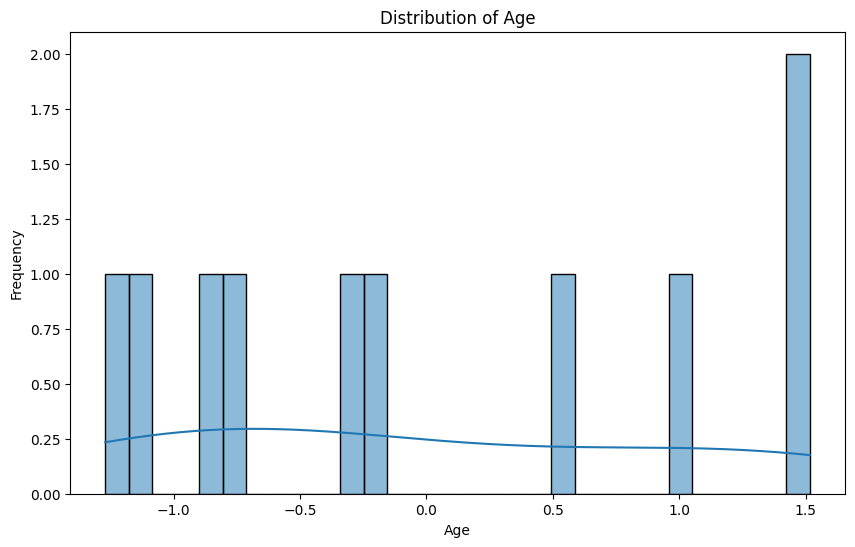

✅ Plot saved to: Data_Collection_Preprocessing/Visualization_Results/age_distribution.png


In [13]:
# Histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Save the plot as an image
visualization_path = "Data_Collection_Preprocessing/Visualization_Results/age_distribution.png"
plt.savefig(visualization_path)

# Display the plot
plt.show()

# Print confirmation
print(f"✅ Plot saved to: {visualization_path}")


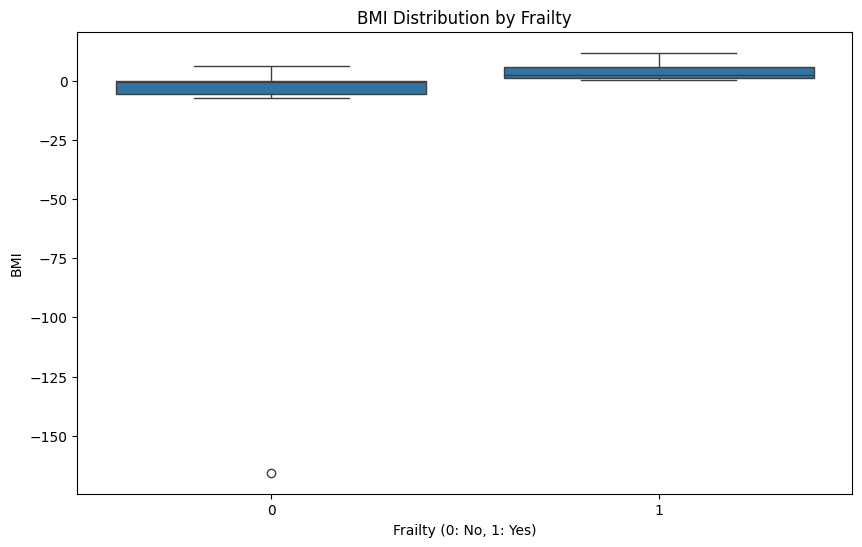

✅ Plot saved to: Data_Collection_Preprocessing/Visualization_Results/bmi_distribution_by_frailty.png


In [14]:
# Calculate BMI (assuming height is in meters and weight is in kilograms)
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Now, we can plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Frailty', y='BMI', data=df)
plt.title('BMI Distribution by Frailty')
plt.xlabel('Frailty (0: No, 1: Yes)')
plt.ylabel('BMI')

# Save the plot
visualization_path = "Data_Collection_Preprocessing/Visualization_Results/bmi_distribution_by_frailty.png"
plt.savefig(visualization_path)

# Display the plot
plt.show()

# Print confirmation
print(f"✅ Plot saved to: {visualization_path}")


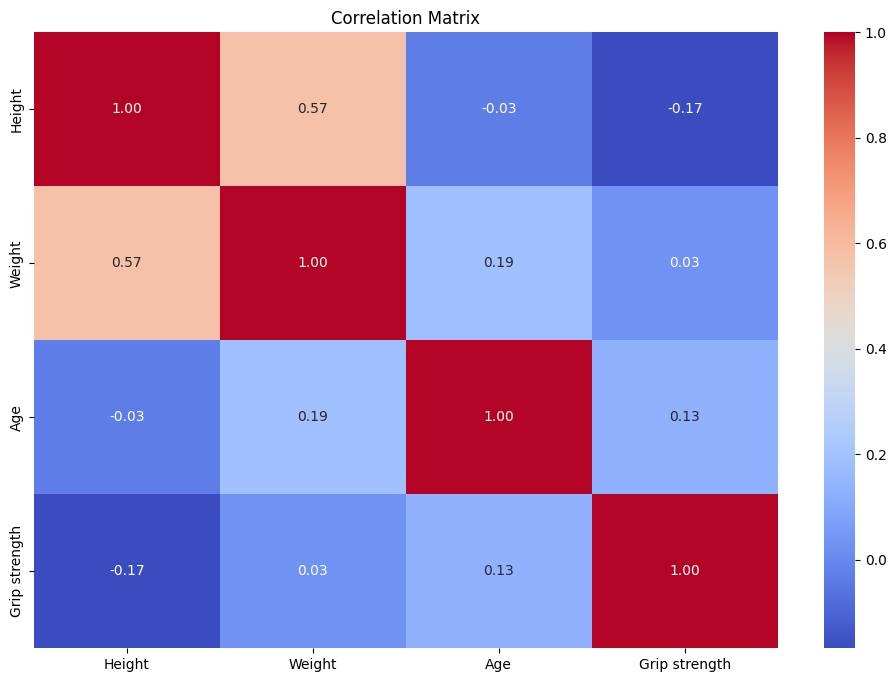

In [15]:
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
# Save the plot as an image
visualization_path = "Data_Collection_Preprocessing/Visualization_Results/Correlation_Matrix.png"
plt.savefig(visualization_path)
plt.show()


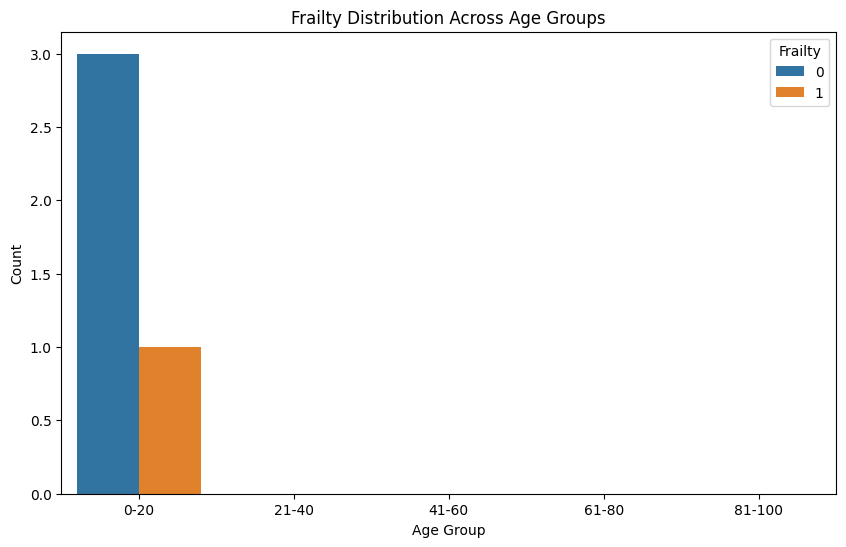

In [16]:
plt.figure(figsize=(10, 6))
age_groups = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
sns.countplot(x=age_groups, hue='Frailty', data=df)
plt.title('Frailty Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
visualization_path = "Data_Collection_Preprocessing/Visualization_Results/Frailty_Distribution_Across_Age_Groups.png"
plt.savefig(visualization_path)
plt.show()


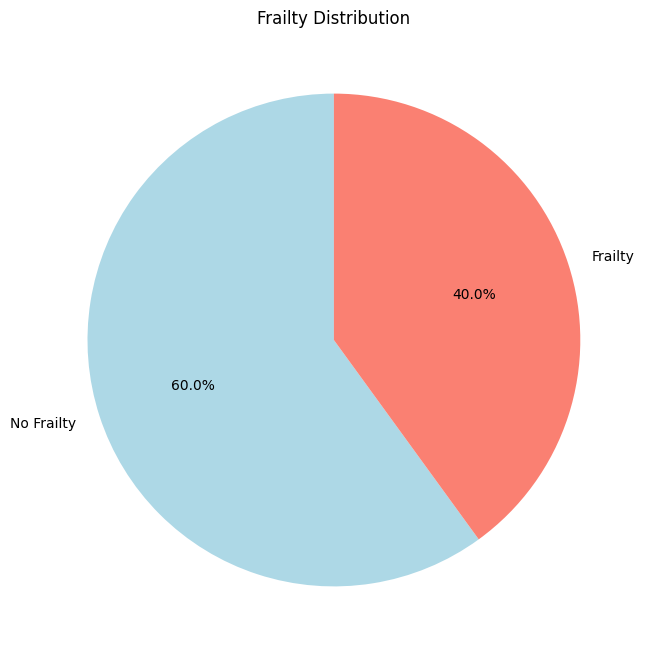

In [17]:
frailty_counts = df['Frailty'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(frailty_counts, labels=['No Frailty', 'Frailty'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Frailty Distribution')
visualization_path = "Data_Collection_Preprocessing/Visualization_Results/Frailty_Distribution.png"
plt.savefig(visualization_path)
plt.show()


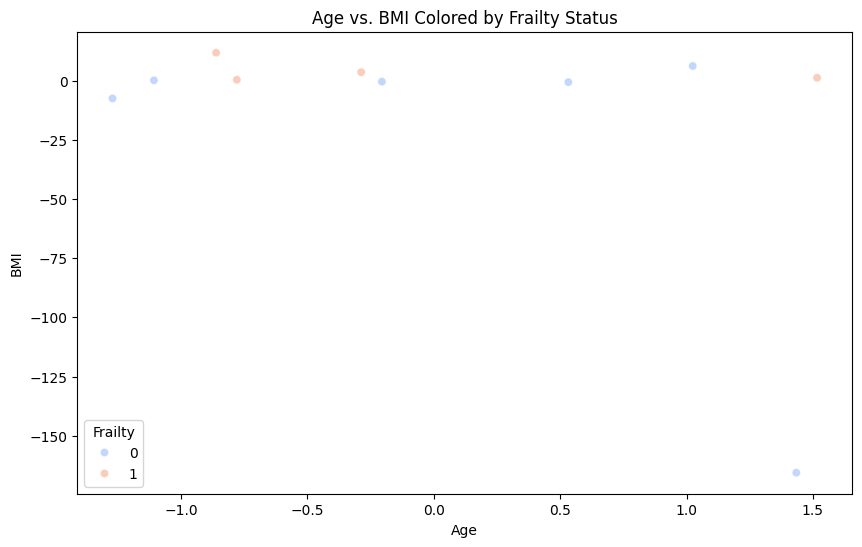

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Frailty', data=df, palette='coolwarm', alpha=0.7)
plt.title('Age vs. BMI Colored by Frailty Status')
plt.xlabel('Age')
plt.ylabel('BMI')
visualization_path = "Data_Collection_Preprocessing/Visualization_Results/ScatterPlot_Age_BMI_Colored_by_Frailty_Status.png"
plt.savefig(visualization_path)
plt.show()
